In [1]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
#warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Now let's import and put the train and test datasets in  pandas dataframe
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

Text(0.5, 0, 'GrLivArea')

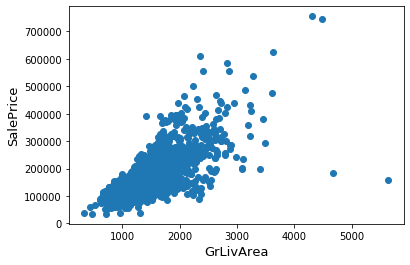

In [3]:
#show all plots
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)

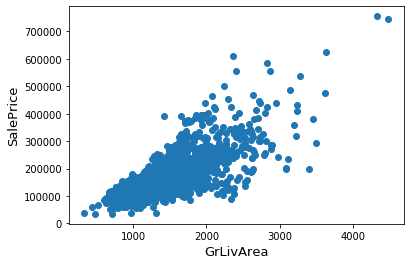

In [4]:
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [5]:
#applying log transformation
#df_train['SalePrice'] = np.log(df_train['SalePrice'])
y_log = np.log(train.SalePrice)

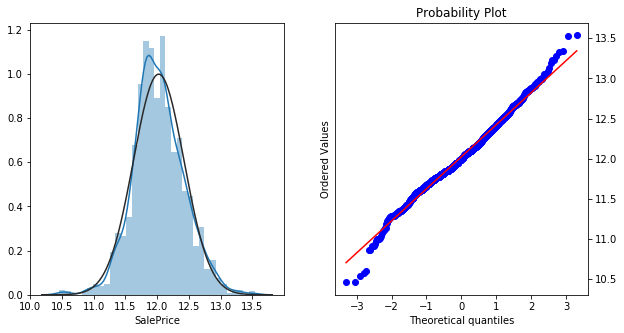

In [6]:
#transformed histogram and normal probability plot
fig = plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sns.distplot(y_log, fit=norm);
ax=plt.subplot(1,2,2)
ax.yaxis.tick_right()
res = stats.probplot(y_log, plot=plt)

In [7]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (1458, 81) 
The test data size before dropping Id feature is : (1459, 80) 

The train data size after dropping Id feature is : (1458, 80) 
The test data size after dropping Id feature is : (1459, 79) 


In [8]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
#all_data = pd.concat((train, test)).reset_index(drop=True)
train_data = train.copy() 
test_data = test.copy()
#all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(train_data.shape))

all_data size is : (1458, 80)


In [9]:
train_data.drop(['SalePrice'], axis=1, inplace=True)

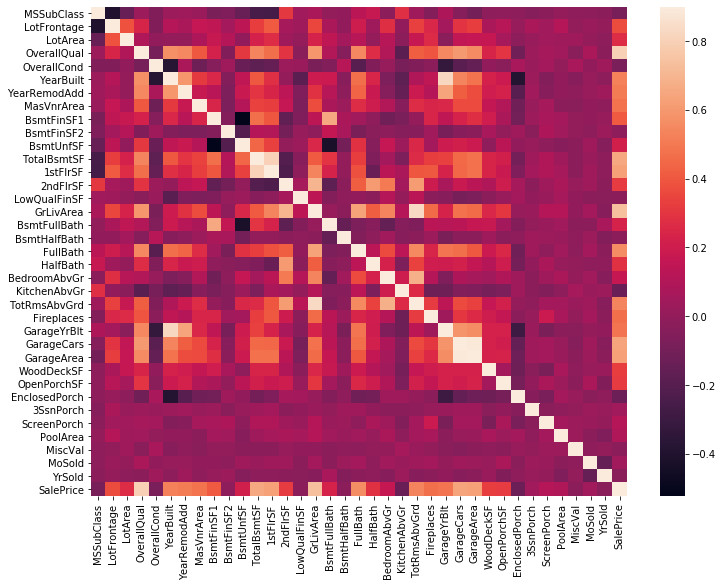

In [10]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.9, square=False);

## 檢查missing 資料的分布

Text(0.5, 1.0, 'Percent missing data by feature')

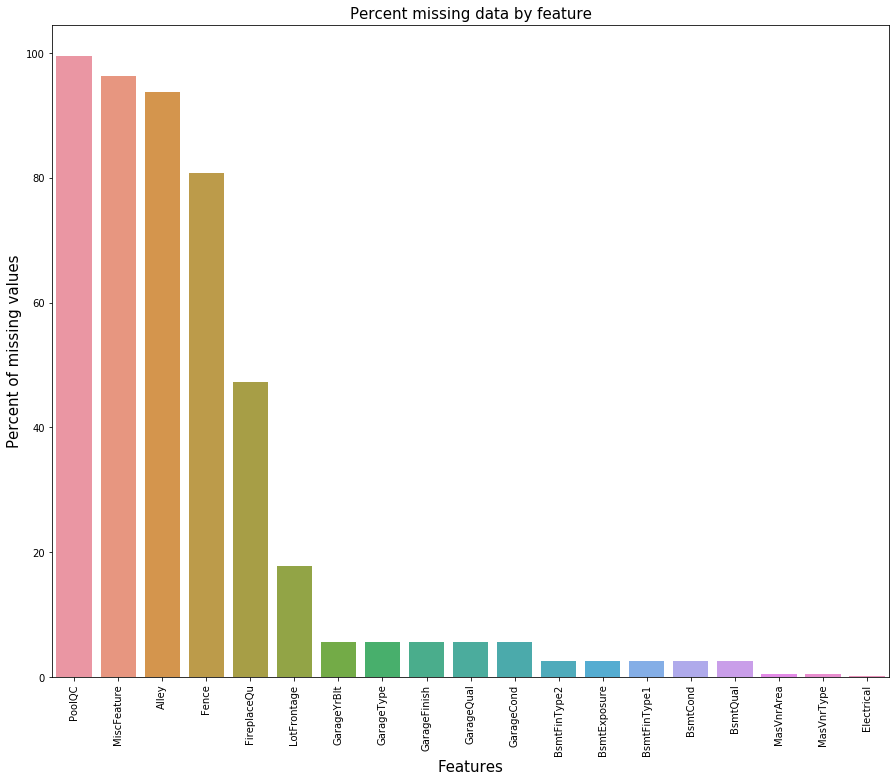

In [11]:
#train data missing check
train_data_na = (train_data.isnull().sum() / len(train_data)) * 100
train_data_na = train_data_na.drop(train_data_na[train_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :train_data_na})
missing_data.shape
missing_data.head(30)

f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=train_data_na.index, y=train_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

Text(0.5, 1.0, 'Percent missing data by feature')

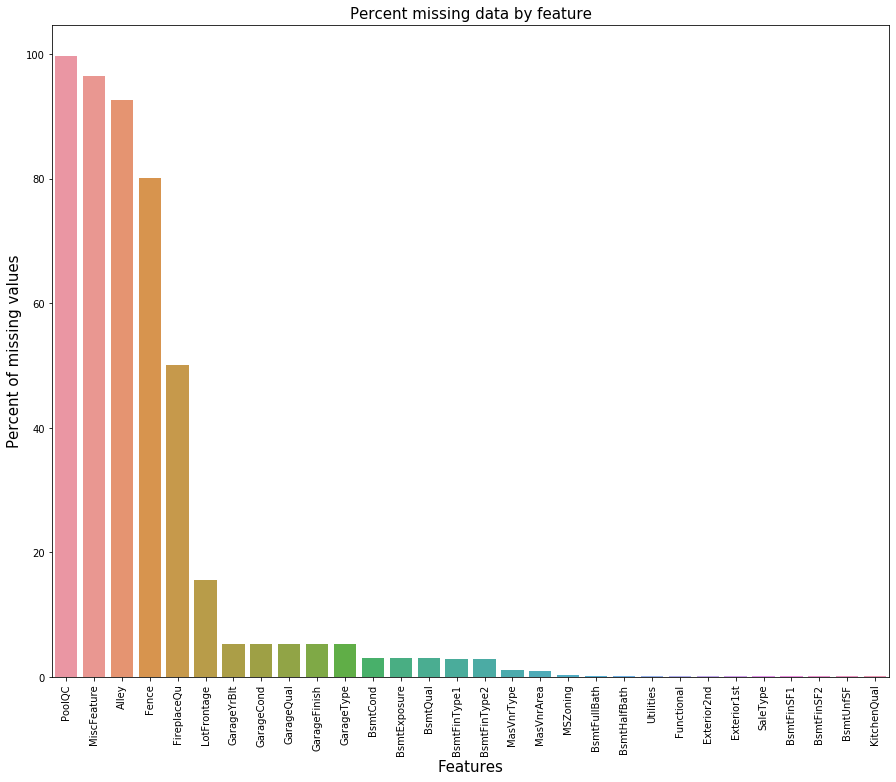

In [12]:
#test data missing check
test_data_na = (test_data.isnull().sum() / len(test_data)) * 100
test_data_na = test_data_na.drop(test_data_na[test_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :test_data_na})
missing_data.shape
missing_data.head(30)

f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=test_data_na.index, y=test_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

## 進行missing data補充

In [13]:
#dealing with missing data in train set
train_data["PoolQC"] = train_data["PoolQC"].fillna("None")
train_data["MiscFeature"] = train_data["MiscFeature"].fillna("None")
train_data["Alley"] = train_data["Alley"].fillna("None")
train_data["Fence"] = train_data["Fence"].fillna("None")
train_data["FireplaceQu"] = train_data["FireplaceQu"].fillna("None")
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
train_data["LotFrontage"] = train_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    train_data[col] = train_data[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    train_data[col] = train_data[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train_data[col] = train_data[col].fillna('None')
train_data["MasVnrType"] = train_data["MasVnrType"].fillna("None")
train_data["MasVnrArea"] = train_data["MasVnrArea"].fillna(0)
train_data['MSZoning'] = train_data['MSZoning'].fillna(train_data['MSZoning'].mode()[0])
train_data = train_data.drop(['Utilities'], axis=1)
train_data["Functional"] = train_data["Functional"].fillna("Typ")
train_data['Electrical'] = train_data['Electrical'].fillna(train_data['Electrical'].mode()[0])
train_data['KitchenQual'] = train_data['KitchenQual'].fillna(train_data['KitchenQual'].mode()[0])
train_data['Exterior1st'] = train_data['Exterior1st'].fillna(train_data['Exterior1st'].mode()[0])
train_data['Exterior2nd'] = train_data['Exterior2nd'].fillna(train_data['Exterior2nd'].mode()[0])
train_data['SaleType'] = train_data['SaleType'].fillna(train_data['SaleType'].mode()[0])
train_data['MSSubClass'] = train_data['MSSubClass'].fillna("None")
#Check remaining missing values if any 
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    train_data[col] = train_data[col].fillna(0)
train_data_na = (train_data.isnull().sum() / len(train_data)) * 100
train_data_na = train_data_na.drop(train_data_na[train_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :train_data_na})
print("training set missing: ",missing_data.head())

training set missing:  Empty DataFrame
Columns: [Missing Ratio]
Index: []


In [14]:
#dealing with missing data in test set
test_data["PoolQC"] = test_data["PoolQC"].fillna("None")
test_data["MiscFeature"] = test_data["MiscFeature"].fillna("None")
test_data["Alley"] = test_data["Alley"].fillna("None")
test_data["Fence"] = test_data["Fence"].fillna("None")
test_data["FireplaceQu"] = test_data["FireplaceQu"].fillna("None")
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
test_data["LotFrontage"] = test_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    test_data[col] = test_data[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    test_data[col] = test_data[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    test_data[col] = test_data[col].fillna('None')
test_data["MasVnrType"] = test_data["MasVnrType"].fillna("None")
test_data["MasVnrArea"] = test_data["MasVnrArea"].fillna(0)
test_data['MSZoning'] = test_data['MSZoning'].fillna(test_data['MSZoning'].mode()[0])
test_data = test_data.drop(['Utilities'], axis=1)
test_data["Functional"] = test_data["Functional"].fillna("Typ")
test_data['Electrical'] = test_data['Electrical'].fillna(test_data['Electrical'].mode()[0])
test_data['KitchenQual'] = test_data['KitchenQual'].fillna(test_data['KitchenQual'].mode()[0])
test_data['Exterior1st'] = test_data['Exterior1st'].fillna(test_data['Exterior1st'].mode()[0])
test_data['Exterior2nd'] = test_data['Exterior2nd'].fillna(test_data['Exterior2nd'].mode()[0])
test_data['SaleType'] = test_data['SaleType'].fillna(test_data['SaleType'].mode()[0])
test_data['MSSubClass'] = test_data['MSSubClass'].fillna("None")
#Check remaining missing values if any 
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    test_data[col] = test_data[col].fillna(0)
test_data_na = (test_data.isnull().sum() / len(test_data)) * 100
test_data_na = test_data_na.drop(test_data_na[test_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :test_data_na})
print("testing set missing: ",missing_data)

testing set missing:  Empty DataFrame
Columns: [Missing Ratio]
Index: []


## 數值轉類別

In [15]:
NumStr = ["MSSubClass","BsmtFullBath","BsmtHalfBath","HalfBath","BedroomAbvGr","KitchenAbvGr","MoSold","YrSold","YearBuilt","YearRemodAdd","LowQualFinSF","GarageYrBlt"]
for col in NumStr:
    train_data[col]=train_data[col].astype(str)
##Changing OverallCond into a categorical variable
#all_data['OverallCond'] = all_data['OverallCond'].astype(str)

##Year and month sold are transformed into categorical features.
#all_data['YrSold'] = all_data['YrSold'].astype(str)
#all_data['MoSold'] = all_data['MoSold'].astype(str)

In [16]:
NumStr = ["MSSubClass","BsmtFullBath","BsmtHalfBath","HalfBath","BedroomAbvGr","KitchenAbvGr","MoSold","YrSold","YearBuilt","YearRemodAdd","LowQualFinSF","GarageYrBlt"]
for col in NumStr:
    test_data[col]=test_data[col].astype(str)
##Changing OverallCond into a categorical variable
#all_data['OverallCond'] = all_data['OverallCond'].astype(str)

##Year and month sold are transformed into categorical features.
#all_data['YrSold'] = all_data['YrSold'].astype(str)
#all_data['MoSold'] = all_data['MoSold'].astype(str)

## 類別轉數值

In [17]:
from sklearn.preprocessing import LabelEncoder
#cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope', 'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 'YrSold', 'MoSold')
## process columns, apply LabelEncoder to categorical features
#for c in cols:
#    lbl = LabelEncoder() 
#    lbl.fit(list(all_data[c].values)) 
#    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
#print('Shape all_data: {}'.format(all_data.shape))

## 新增參數

In [18]:
# Adding total sqfootage feature 
train_data['TotalSF'] = train_data['TotalBsmtSF'] + train_data['1stFlrSF'] + train_data['2ndFlrSF']

In [19]:
# Adding total sqfootage feature test
test_data['TotalSF'] = test_data['TotalBsmtSF'] + test_data['1stFlrSF'] + test_data['2ndFlrSF']

## 特徵組合 - 將實際為類別的特徵資料由數值轉為類別

In [20]:
#all_data.groupby(['MSSubClass'])[['SalePrice']].agg(['mean','median','count'])

In [21]:
#from ALL YOU NEED IS PCA
#full=all_data.copy()
#def map_values():
#    full["oMSSubClass"] = full.MSSubClass.map({'180':1, 
#                                        '30':2, '45':2, 
#                                        '190':3, '50':3, '90':3, 
#                                        '85':4, '40':4, '160':4, 
#                                        '70':5, '20':5, '75':5, '80':5, #'150':5, '150'為test set的數值，在此移除
#                                        '120': 6, '60':6})
    
#    full["oMSZoning"] = full.MSZoning.map({'C (all)':1, 'RH':2, 'RM':2, 'RL':3, 'FV':4})
    
#    full["oNeighborhood"] = full.Neighborhood.map({'MeadowV':1,
#                                               'IDOTRR':2, 'BrDale':2,
#                                               'OldTown':3, 'Edwards':3, 'BrkSide':3,
#                                               'Sawyer':4, 'Blueste':4, 'SWISU':4, 'NAmes':4,
#                                               'NPkVill':5, 'Mitchel':5,
#                                               'SawyerW':6, 'Gilbert':6, 'NWAmes':6,
#                                               'Blmngtn':7, 'CollgCr':7, 'ClearCr':7, 'Crawfor':7,
#                                               'Veenker':8, 'Somerst':8, 'Timber':8,
#                                               'StoneBr':9,
#                                               'NoRidge':10, 'NridgHt':10})
    
#    full["oCondition1"] = full.Condition1.map({'Artery':1,
#                                           'Feedr':2, 'RRAe':2,
#                                           'Norm':3, 'RRAn':3,
#                                           'PosN':4, 'RRNe':4,
#                                           'PosA':5 ,'RRNn':5})
    
#    full["oBldgType"] = full.BldgType.map({'2fmCon':1, 'Duplex':1, 'Twnhs':1, '1Fam':2, 'TwnhsE':2})
    
#    full["oHouseStyle"] = full.HouseStyle.map({'1.5Unf':1, 
#                                           '1.5Fin':2, '2.5Unf':2, 'SFoyer':2, 
#                                           '1Story':3, 'SLvl':3,
#                                           '2Story':4, '2.5Fin':4})
    
#    full["oExterior1st"] = full.Exterior1st.map({'BrkComm':1,
#                                             'AsphShn':2, 'CBlock':2, 'AsbShng':2,
#                                             'WdShing':3, 'Wd Sdng':3, 'MetalSd':3, 'Stucco':3, 'HdBoard':3,
#                                             'BrkFace':4, 'Plywood':4,
#                                             'VinylSd':5,
#                                             'CemntBd':6,
#                                             'Stone':7, 'ImStucc':7})
    
#    full["oMasVnrType"] = full.MasVnrType.map({'BrkCmn':1, 'None':1, 'BrkFace':2, 'Stone':3})
    
#    full["oExterQual"] = full.ExterQual.map({'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
    
#    full["oFoundation"] = full.Foundation.map({'Slab':1, 
#                                           'BrkTil':2, 'CBlock':2, 'Stone':2,
#                                           'Wood':3, 'PConc':4})
    
#    full["oBsmtQual"] = full.BsmtQual.map({'Fa':2, 'None':1, 'TA':3, 'Gd':4, 'Ex':5})
    
#    full["oBsmtExposure"] = full.BsmtExposure.map({'None':1, 'No':2, 'Av':3, 'Mn':3, 'Gd':4})
    
#    full["oHeating"] = full.Heating.map({'Floor':1, 'Grav':1, 'Wall':2, 'OthW':3, 'GasW':4, 'GasA':5})
    
#    full["oHeatingQC"] = full.HeatingQC.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    
#    full["oKitchenQual"] = full.KitchenQual.map({'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
    
#    full["oFunctional"] = full.Functional.map({'Maj2':1, 'Maj1':2, 'Min1':2, 'Min2':2, 'Mod':2, 'Sev':2, 'Typ':3})
    
#    full["oFireplaceQu"] = full.FireplaceQu.map({'None':1, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    
#    full["oGarageType"] = full.GarageType.map({'CarPort':1, 'None':1,
#                                           'Detchd':2,
#                                           '2Types':3, 'Basment':3,
#                                           'Attchd':4, 'BuiltIn':5})
    
#    full["oGarageFinish"] = full.GarageFinish.map({'None':1, 'Unf':2, 'RFn':3, 'Fin':4})
    
#    full["oPavedDrive"] = full.PavedDrive.map({'N':1, 'P':2, 'Y':3})
    
#    full["oSaleType"] = full.SaleType.map({'COD':1, 'ConLD':1, 'ConLI':1, 'ConLw':1, 'Oth':1, 'WD':1,
#                                       'CWD':2, 'Con':3, 'New':3})
    
#    full["oSaleCondition"] = full.SaleCondition.map({'AdjLand':1, 'Abnorml':2, 'Alloca':2, 'Family':2, 'Normal':3, 'Partial':4})            
                
                        
                        
    
#    return "Done!"


In [22]:
#map_values()

## PipeLine

In [23]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
class labelenc(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        lab=LabelEncoder()
        X["YearBuilt"] = lab.fit_transform(X["YearBuilt"])
        X["YearRemodAdd"] = lab.fit_transform(X["YearRemodAdd"])
        X["GarageYrBlt"] = lab.fit_transform(X["GarageYrBlt"])
        return X

In [24]:
from scipy.stats import skew
class skew_dummies(BaseEstimator, TransformerMixin):
    def __init__(self,skew=0.5):
        self.skew = skew
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        X_numeric=X.select_dtypes(exclude=["object"])
        skewness = X_numeric.apply(lambda x: skew(x))
        skewness_features = skewness[abs(skewness) >= self.skew].index
        X[skewness_features] = np.log1p(X[skewness_features])
        X = pd.get_dummies(X)
        return X

In [25]:
# build pipeline
from sklearn.pipeline import Pipeline, make_pipeline
pipe = Pipeline([
    ('labenc', labelenc()),
    ('skew_dummies', skew_dummies(skew=1)),
    ])

In [26]:
#preparing full data to prevant dimentional change caused by dummy 
all_data = pd.concat((train_data, test_data)).reset_index(drop=True)
all_data.shape

(2917, 79)

In [27]:
data_pipe = pipe.fit_transform(all_data)

In [28]:
data_pipe.shape

(2917, 389)

In [29]:
#let pandas shaow all columns
#pd.set_option('display.max_columns', None)
data_pipe.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.189655,9.042040,7,5,110,53,5.283204,706.0,0.0,150.0,...,0,0,0,1,0,0,0,0,1,0
1,4.394449,9.169623,6,8,83,26,0.000000,978.0,0.0,284.0,...,0,0,0,1,0,0,0,0,1,0
2,4.234107,9.328212,7,5,108,52,5.093750,486.0,0.0,434.0,...,0,0,0,1,0,0,0,0,1,0
3,4.110874,9.164401,7,5,25,20,0.000000,216.0,0.0,540.0,...,0,0,0,1,1,0,0,0,0,0
4,4.442651,9.565284,8,5,107,50,5.860786,655.0,0.0,490.0,...,0,0,0,1,0,0,0,0,1,0


+ __use robustscaler since maybe there are other outliers.__

In [30]:
from sklearn.preprocessing import RobustScaler, StandardScaler
scaler = RobustScaler()

In [31]:
n_train=train_data.shape[0]

X = data_pipe[:n_train]
test_X = data_pipe[n_train:]
y= train.SalePrice

X_scaled = scaler.fit(X).transform(X)
y_log = np.log(train.SalePrice)
test_X_scaled = scaler.transform(test_X)

In [32]:
X_scaled.shape

(1458, 389)

## Feature Selection by Lasso

adding features to pipeline

In [33]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [34]:
lasso=Lasso(alpha=0.001)
lasso.fit(X_scaled,y_log)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [35]:
FI_lasso = pd.DataFrame({"Feature Importance":lasso.coef_}, index=data_pipe.columns)

In [36]:
FI_lasso.sort_values("Feature Importance",ascending=False)

,Feature Importance
OverallQual,0.110352
YearBuilt,0.094075
2ndFlrSF,0.086447
GrLivArea,0.086340
Neighborhood_Crawfor,0.083223
...,...
KitchenAbvGr_2,-0.032364
MSZoning_RM,-0.034519
CentralAir_N,-0.034989
SaleCondition_Abnorml,-0.055946


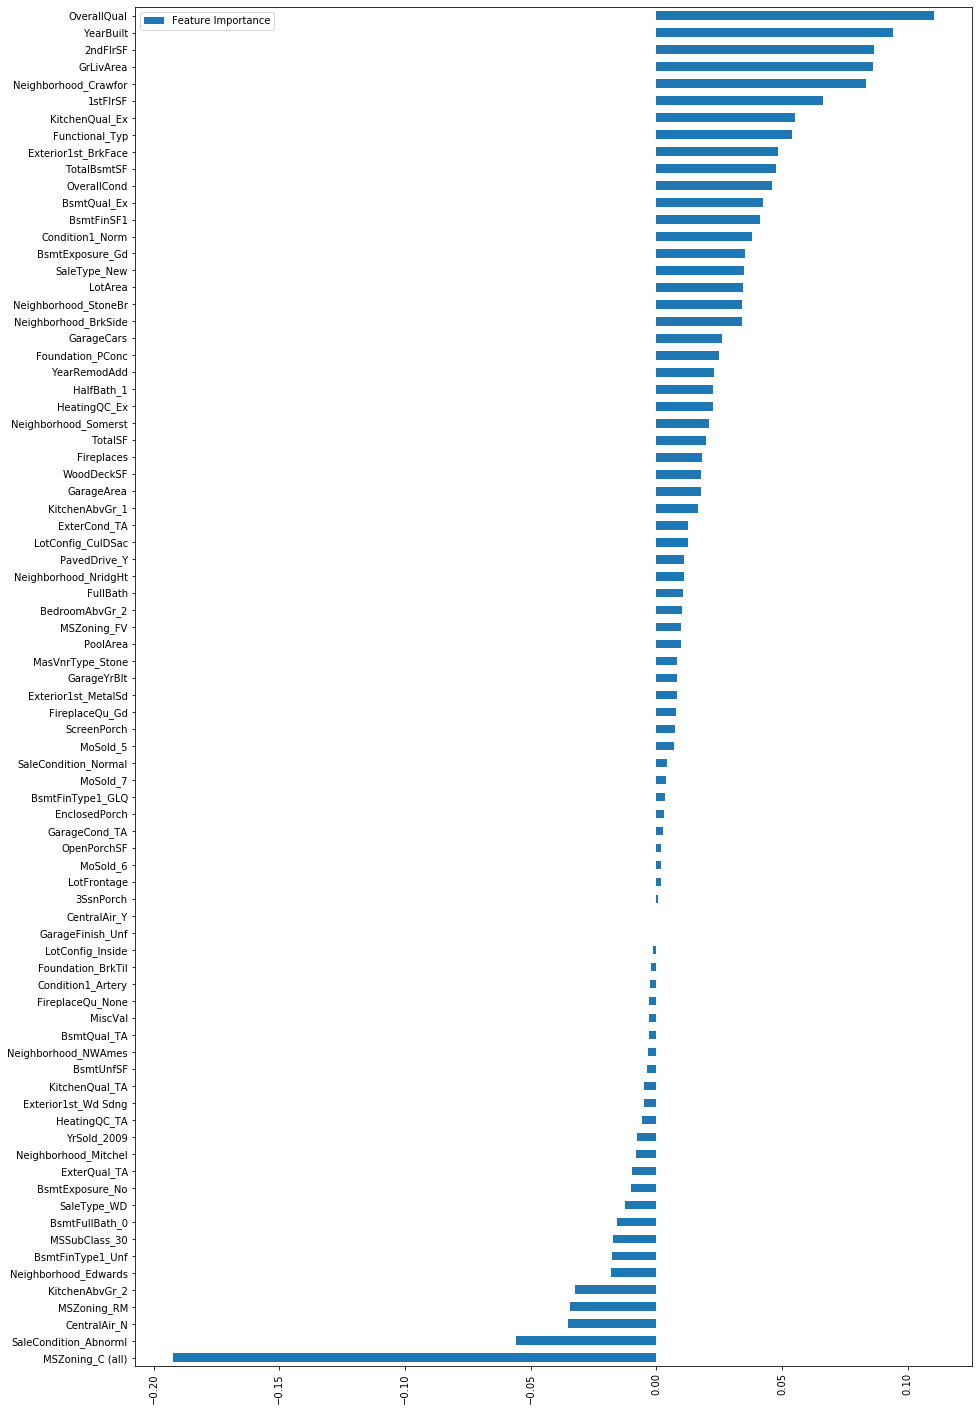

In [37]:
FI_lasso[FI_lasso["Feature Importance"]!=0].sort_values("Feature Importance").plot(kind="barh",figsize=(15,25))
plt.xticks(rotation=90)
plt.show()

In [38]:
class add_feature(BaseEstimator, TransformerMixin):
    def __init__(self,additional=1):
        self.additional = additional
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        if self.additional==1:
            X["TotalHouse"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"]   
            X["TotalArea"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"] + X["GarageArea"]
            
        else:
            X["TotalHouse"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"]   
            X["TotalArea"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"] + X["GarageArea"]
            
            X["+_TotalHouse_OverallQual"] = X["TotalHouse"] * X["OverallQual"]
            X["+_GrLivArea_OverallQual"] = X["GrLivArea"] * X["OverallQual"]
            #X["+_oMSZoning_TotalHouse"] = X["oMSZoning"] * X["TotalHouse"]
            #X["+_oMSZoning_OverallQual"] = X["oMSZoning"] + X["OverallQual"]
            #X["+_oMSZoning_YearBuilt"] = X["oMSZoning"] + X["YearBuilt"]
            #X["+_oNeighborhood_TotalHouse"] = X["oNeighborhood"] * X["TotalHouse"]
            #X["+_oNeighborhood_OverallQual"] = X["oNeighborhood"] + X["OverallQual"]
            #X["+_oNeighborhood_YearBuilt"] = X["oNeighborhood"] + X["YearBuilt"]
            X["+_BsmtFinSF1_OverallQual"] = X["BsmtFinSF1"] * X["OverallQual"]
            
            #X["-_oFunctional_TotalHouse"] = X["oFunctional"] * X["TotalHouse"]
            #X["-_oFunctional_OverallQual"] = X["oFunctional"] + X["OverallQual"]
            X["-_LotArea_OverallQual"] = X["LotArea"] * X["OverallQual"]
            X["-_TotalHouse_LotArea"] = X["TotalHouse"] + X["LotArea"]
            #X["-_oCondition1_TotalHouse"] = X["oCondition1"] * X["TotalHouse"]
            #X["-_oCondition1_OverallQual"] = X["oCondition1"] + X["OverallQual"]
            
           
            X["Bsmt"] = X["BsmtFinSF1"] + X["BsmtFinSF2"] + X["BsmtUnfSF"]
            X["Rooms"] = X["FullBath"]+X["TotRmsAbvGrd"]
            X["PorchArea"] = X["OpenPorchSF"]+X["EnclosedPorch"]+X["3SsnPorch"]+X["ScreenPorch"]
            X["TotalPlace"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"] + X["GarageArea"] + X["OpenPorchSF"]+X["EnclosedPorch"]+X["3SsnPorch"]+X["ScreenPorch"]

    
            return X

In [39]:
pipe = Pipeline([
    ('labenc', labelenc()),
    ('add_feature', add_feature(additional=2)),
    ('skew_dummies', skew_dummies(skew=1)),
    ])

In [40]:
data_pipe = pipe.fit_transform(all_data)

In [41]:
data_pipe.shape

(2917, 400)

In [42]:
n_train=train.shape[0]
X = data_pipe[:n_train]
test_X = data_pipe[n_train:]
y= train.SalePrice

X_scaled = scaler.fit(X).transform(X)
y_log = np.log(train.SalePrice)
test_X_scaled = scaler.transform(test_X)


In [43]:
from sklearn.decomposition import PCA, KernelPCA
pca = PCA(n_components=400)

In [44]:
X_scaled=pca.fit_transform(X_scaled)
test_X_scaled = pca.transform(test_X_scaled)

In [45]:
X_scaled.shape, test_X_scaled.shape

((1458, 400), (1459, 400))

In [46]:
test_X_scaled

array([[-2.70182658,  1.68857213, -1.12768136, ...,  0.38515347,
        -0.50219157,  0.02469154],
       [-0.3845161 ,  2.22572407, -0.89222424, ...,  0.38515347,
        -0.50219157,  0.02469154],
       [ 1.02097919,  0.03584273,  0.14567445, ...,  0.38515347,
        -0.50219157,  0.02469154],
       ...,
       [-0.096394  ,  3.51664189, -0.87438837, ..., -0.04245055,
        -0.34547553,  0.03318175],
       [-3.24910194,  0.32522218, -0.32578897, ..., -0.00481678,
        -0.21097712,  0.01830133],
       [ 3.40420634, -0.394654  ,  1.10787959, ...,  0.38515347,
        -0.50219157,  0.02469154]])

# Try DNN..but performance is not very good.

In [47]:

# col_train = list(train.columns)
# col_train_bis = list(train.columns)
# COLUMNS = col_train
# FEATURES = col_train_bis
# LABEL = "SalePrice"
# feature_cols = FEATURES
# # Training set and Prediction set with the features to predict
# training_set = train[COLUMNS]
# prediction_set = train.SalePrice

In [48]:
# import keras
# import numpy as np
# import pandas as pd
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.wrappers.scikit_learn import KerasRegressor
# model = keras.models.Sequential()

# # model = Sequential()
# # model.add(Dense(200, input_dim=410, kernel_initializer='normal', activation='relu'))
# # model.add(Dense(100, kernel_initializer='normal', activation='relu'))
# # model.add(Dense(50, kernel_initializer='normal', activation='relu'))
# # model.add(Dense(25, kernel_initializer='normal', activation='relu'))
# # model.add(Dense(1, kernel_initializer='normal'))


# model = keras.models.Sequential([
# # keras.layers.Flatten(input_dim=410),
# # keras.layers.BatchNormalization(),
# keras.layers.Dense(200, input_dim=410,activation="relu", kernel_initializer="normal"),
# keras.layers.BatchNormalization(),
# keras.layers.Dense(100, activation="relu", kernel_initializer="normal"),
# keras.layers.BatchNormalization(),
# keras.layers.Dense(50, activation="relu", kernel_initializer="normal"),
# keras.layers.BatchNormalization(),
# keras.layers.Dense(25, activation="relu", kernel_initializer="normal"),
# keras.layers.BatchNormalization(),
# keras.layers.Dense(1, kernel_initializer='normal')
# ])


# # Compile model
# model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adadelta())

In [49]:
# model.fit(X_scaled, y_log, epochs=1000, batch_size=10,callbacks=[keras.callbacks.EarlyStopping(patience=3)])

In [50]:
# model.evaluate(X_scaled, y_log)

In [51]:
# #y_predict = model.predict(test_X_scaled)
# y_predict = np.exp(model.predict(test_X_scaled))
# ID = test_ID

In [52]:
# import itertools
# def to_submit(pred_y,name_out):
#     y_predict = list(itertools.islice(pred_y, test.shape[0]))
#     y_predict = pd.DataFrame((np.array(y_predict).reshape(len(y_predict),1)), columns = ['SalePrice'])
#     y_predict = y_predict.join(ID)
#     y_predict.to_csv(name_out + '.csv',index=False)
    
# to_submit(y_predict, "DNN_submission_v02")

## Modeling & Evaluation

In [53]:
# define cross validation strategy
def rmse_cv(model,X,y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))
    return rmse

choose 13 models and use 5-folds cross-calidation to evaluate these models.

Models include:
* LinearRegression
* Ridge
* Lasso
* Random Forrest
* Gradient Boosting Tree
* Support Vector Regression
* Linear Support Vector Regression
* ElasticNet
* Stochastic Gradient Descent
* BayesianRidge
* KernelRidge
* ExtraTreesRegressor
* XgBoost

In [54]:
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import ElasticNet, SGDRegressor, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBRegressor
models = [LinearRegression(),Ridge(),Lasso(alpha=0.01,max_iter=10000),RandomForestRegressor(),GradientBoostingRegressor(),SVR(),LinearSVR(),
          ElasticNet(alpha=0.001,max_iter=10000),SGDRegressor(max_iter=1000,tol=1e-3),BayesianRidge(),KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5),
          ExtraTreesRegressor(),XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)]

In [55]:
names = ["LR", "Ridge", "Lasso", "RF", "GBR", "SVR", "LinSVR", "Ela","SGD","Bay","Ker","Extra","Xgb"]
for name, model in zip(names, models):
    score = rmse_cv(model, X_scaled, y_log)
    print("{}: {:.6f}, {:.4f}".format(name,score.mean(),score.std()))

LR: 55777411091.226463, 98356459689.5727
Ridge: 0.117416, 0.0089
Lasso: 0.130532, 0.0056
RF: 0.146155, 0.0073
GBR: 0.132427, 0.0083
SVR: 0.136605, 0.0116


/home/skai/anaconda3/envs/jupyterhub/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/skai/anaconda3/envs/jupyterhub/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/skai/anaconda3/envs/jupyterhub/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/skai/anaconda3/envs/jupyterhub/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/skai/anaconda3/envs/jupyterhub/lib/python3.7/site-packages/sklearn/svm/_base.py:947: C

LinSVR: 0.120311, 0.0099
Ela: 0.112437, 0.0064
SGD: 0.148064, 0.0115
Bay: 0.111845, 0.0066
Ker: 0.111597, 0.0063
Extra: 0.138304, 0.0056
Xgb: 0.138990, 0.0058


In [56]:
class grid():
    def __init__(self,model):
        self.model = model
    
    def grid_get(self,X,y,param_grid):
        grid_search = GridSearchCV(self.model,param_grid,cv=5, scoring="neg_mean_squared_error")
        grid_search.fit(X,y)
        print(grid_search.best_params_, np.sqrt(-grid_search.best_score_))
        grid_search.cv_results_['mean_test_score'] = np.sqrt(-grid_search.cv_results_['mean_test_score'])
        print(pd.DataFrame(grid_search.cv_results_)[['params','mean_test_score','std_test_score']]) 

### Lasso

In [57]:
grid(Lasso()).grid_get(X_scaled,y_log,{'alpha': [0.0004,0.0005,0.0007,0.0009],'max_iter':[10000]})

{'alpha': 0.0004, 'max_iter': 10000} 0.11248591579016004
                                 params  mean_test_score  std_test_score
0  {'alpha': 0.0004, 'max_iter': 10000}         0.112486        0.001473
1  {'alpha': 0.0005, 'max_iter': 10000}         0.112623        0.001476
2  {'alpha': 0.0007, 'max_iter': 10000}         0.113289        0.001499
3  {'alpha': 0.0009, 'max_iter': 10000}         0.114035        0.001545


### Ridge

In [58]:
grid(Ridge()).grid_get(X_scaled,y_log,{'alpha':[35,40,45,50,55,60,65,70,80,90]})

{'alpha': 35} 0.1120096901270263
          params  mean_test_score  std_test_score
0  {'alpha': 35}         0.112010        0.001431
1  {'alpha': 40}         0.112130        0.001431
2  {'alpha': 45}         0.112263        0.001432
3  {'alpha': 50}         0.112404        0.001434
4  {'alpha': 55}         0.112550        0.001437
5  {'alpha': 60}         0.112700        0.001441
6  {'alpha': 65}         0.112852        0.001444
7  {'alpha': 70}         0.113006        0.001447
8  {'alpha': 80}         0.113314        0.001454
9  {'alpha': 90}         0.113622        0.001461


### SVR

In [59]:
grid(SVR()).grid_get(X_scaled,y_log,{'C':[11,13,15],'kernel':["rbf"],"gamma":[0.0003,0.0004],"epsilon":[0.008,0.009]})

{'C': 15, 'epsilon': 0.008, 'gamma': 0.0004, 'kernel': 'rbf'} 0.10930067708447964
                                               params  mean_test_score  \
0   {'C': 11, 'epsilon': 0.008, 'gamma': 0.0003, '...         0.110578   
1   {'C': 11, 'epsilon': 0.008, 'gamma': 0.0004, '...         0.109894   
2   {'C': 11, 'epsilon': 0.009, 'gamma': 0.0003, '...         0.110552   
3   {'C': 11, 'epsilon': 0.009, 'gamma': 0.0004, '...         0.109846   
4   {'C': 13, 'epsilon': 0.008, 'gamma': 0.0003, '...         0.110277   
5   {'C': 13, 'epsilon': 0.008, 'gamma': 0.0004, '...         0.109575   
6   {'C': 13, 'epsilon': 0.009, 'gamma': 0.0003, '...         0.110276   
7   {'C': 13, 'epsilon': 0.009, 'gamma': 0.0004, '...         0.109557   
8   {'C': 15, 'epsilon': 0.008, 'gamma': 0.0003, '...         0.109980   
9   {'C': 15, 'epsilon': 0.008, 'gamma': 0.0004, '...         0.109301   
10  {'C': 15, 'epsilon': 0.009, 'gamma': 0.0003, '...         0.109984   
11  {'C': 15, 'epsilon': 0.009

### Kernel Ridge

In [60]:
param_grid={'alpha':[0.2,0.3,0.4], 'kernel':["polynomial"], 'degree':[3],'coef0':[0.8,1]}
grid(KernelRidge()).grid_get(X_scaled,y_log,param_grid)

{'alpha': 0.2, 'coef0': 1, 'degree': 3, 'kernel': 'polynomial'} 0.11006596122857412
                                              params  mean_test_score  \
0  {'alpha': 0.2, 'coef0': 0.8, 'degree': 3, 'ker...         0.110420   
1  {'alpha': 0.2, 'coef0': 1, 'degree': 3, 'kerne...         0.110066   
2  {'alpha': 0.3, 'coef0': 0.8, 'degree': 3, 'ker...         0.111221   
3  {'alpha': 0.3, 'coef0': 1, 'degree': 3, 'kerne...         0.110454   
4  {'alpha': 0.4, 'coef0': 0.8, 'degree': 3, 'ker...         0.112092   
5  {'alpha': 0.4, 'coef0': 1, 'degree': 3, 'kerne...         0.110941   

   std_test_score  
0        0.001425  
1        0.001424  
2        0.001432  
3        0.001420  
4        0.001444  
5        0.001424  


### ElasticNet

In [61]:
grid(ElasticNet()).grid_get(X_scaled,y_log,{'alpha':[0.0008,0.004,0.005],'l1_ratio':[0.08,0.1,0.3],'max_iter':[10000]})

{'alpha': 0.004, 'l1_ratio': 0.08, 'max_iter': 10000} 0.11218565951639663
                                              params  mean_test_score  \
0  {'alpha': 0.0008, 'l1_ratio': 0.08, 'max_iter'...         0.114943   
1  {'alpha': 0.0008, 'l1_ratio': 0.1, 'max_iter':...         0.114538   
2  {'alpha': 0.0008, 'l1_ratio': 0.3, 'max_iter':...         0.112781   
3  {'alpha': 0.004, 'l1_ratio': 0.08, 'max_iter':...         0.112186   
4  {'alpha': 0.004, 'l1_ratio': 0.1, 'max_iter': ...         0.112393   
5  {'alpha': 0.004, 'l1_ratio': 0.3, 'max_iter': ...         0.115081   
6  {'alpha': 0.005, 'l1_ratio': 0.08, 'max_iter':...         0.112406   
7  {'alpha': 0.005, 'l1_ratio': 0.1, 'max_iter': ...         0.112697   
8  {'alpha': 0.005, 'l1_ratio': 0.3, 'max_iter': ...         0.116209   

   std_test_score  
0        0.001762  
1        0.001736  
2        0.001551  
3        0.001458  
4        0.001454  
5        0.001583  
6        0.001451  
7        0.001466  
8        0.0015

## Ensemble Methods

### Weight Average

* Average base models according to their weights.

In [62]:
class AverageWeight(BaseEstimator, RegressorMixin):
    def __init__(self,mod,weight):
        self.mod = mod
        self.weight = weight
        
    def fit(self,X,y):
        self.models_ = [clone(x) for x in self.mod]
        for model in self.models_:
            model.fit(X,y)
        return self
    
    def predict(self,X):
        w = list()
        pred = np.array([model.predict(X) for model in self.models_])
        # for every data point, single model prediction times weight, then add them together
        for data in range(pred.shape[1]):
            single = [pred[model,data]*weight for model,weight in zip(range(pred.shape[0]),self.weight)]
            w.append(np.sum(single))
        return w

In [63]:
lasso = Lasso(alpha=0.0007,max_iter=10000)
ridge = Ridge(alpha=80)
svr = SVR(gamma= 0.0004,kernel='rbf',C=11,epsilon=0.008)
ker = KernelRidge(alpha=0.2 ,kernel='polynomial',degree=3 , coef0=1)
ela = ElasticNet(alpha=0.005,l1_ratio=0.1,max_iter=10000)
bay = BayesianRidge()

In [64]:
# assign weights based on their gridsearch score
w1 = 0.02
w2 = 0.2
w3 = 0.25
w4 = 0.3
w5 = 0.03
w6 = 0.2

In [65]:
weight_avg = AverageWeight(mod = [lasso,ridge,svr,ker,ela,bay],weight=[w1,w2,w3,w4,w5,w6])

In [66]:
score = rmse_cv(weight_avg,X_scaled,y_log)
print(score.mean())

0.10952802302935283


* But if we average only two best models, we gain better cross-validation score.

In [67]:
weight_avg = AverageWeight(mod = [svr,ker],weight=[0.5,0.5])

In [68]:
score = rmse_cv(weight_avg,X_scaled,y_log)
print(score.mean())

0.1085740601850016


## Stacking

* Aside from normal stacking, I also add the "get_oof" method, because later I'll combine features generated from stacking and original features.

In [69]:
class stacking(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self,mod,meta_model):
        self.mod = mod
        self.meta_model = meta_model
        self.kf = KFold(n_splits=5, random_state=42, shuffle=True)
        
    def fit(self,X,y):
        self.saved_model = [list() for i in self.mod]
        oof_train = np.zeros((X.shape[0], len(self.mod)))
        
        for i,model in enumerate(self.mod):
            for train_index, val_index in self.kf.split(X,y):
                renew_model = clone(model)
                renew_model.fit(X[train_index], y[train_index])
                self.saved_model[i].append(renew_model)
                oof_train[val_index,i] = renew_model.predict(X[val_index])
        
        self.meta_model.fit(oof_train,y)
        return self
    
    def predict(self,X):
        whole_test = np.column_stack([np.column_stack(model.predict(X) for model in single_model).mean(axis=1) 
                                      for single_model in self.saved_model]) 
        return self.meta_model.predict(whole_test)
    
    def get_oof(self,X,y,test_X):
        oof = np.zeros((X.shape[0],len(self.mod)))
        test_single = np.zeros((test_X.shape[0],5))
        test_mean = np.zeros((test_X.shape[0],len(self.mod)))
        for i,model in enumerate(self.mod):
            for j, (train_index,val_index) in enumerate(self.kf.split(X,y)):
                clone_model = clone(model)
                clone_model.fit(X[train_index],y[train_index])
                oof[val_index,i] = clone_model.predict(X[val_index])
                test_single[:,j] = clone_model.predict(test_X)
            test_mean[:,i] = test_single.mean(axis=1)
        return oof, test_mean

In [70]:
# must do imputer first, otherwise stacking won't work, and i don't know why.
from sklearn.impute import SimpleImputer
a = SimpleImputer().fit_transform(X_scaled)
b = SimpleImputer().fit_transform(y_log.values.reshape(-1,1)).ravel()

In [71]:
stack_model = stacking(mod=[lasso,ridge,svr,ker,ela,bay],meta_model=ker)

In [72]:
score = rmse_cv(stack_model,a,b)
print(score.mean())

/home/skai/anaconda3/envs/jupyterhub/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/home/skai/anaconda3/envs/jupyterhub/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/home/skai/anaconda3/envs/jupyterhub/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/home/skai/anaconda3/envs/jupyterhub/lib/python3.7/site-packages/ipykernel_launcher.p

0.10856887108967231


/home/skai/anaconda3/envs/jupyterhub/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/home/skai/anaconda3/envs/jupyterhub/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/home/skai/anaconda3/envs/jupyterhub/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


* Next we extract the features generated from stacking, then combine them with original features.

In [73]:
X_train_stack, X_test_stack = stack_model.get_oof(a,b,test_X_scaled)

In [74]:
X_train_stack.shape, a.shape

((1458, 6), (1458, 400))

In [75]:
X_train_add = np.hstack((a,X_train_stack))

In [76]:
X_test_add = np.hstack((test_X_scaled,X_test_stack))

In [77]:
X_train_add.shape, X_test_add.shape

((1458, 406), (1459, 406))

In [78]:
b.shape

(1458,)

In [79]:
score = rmse_cv(stack_model,X_train_add,b)
print(score.mean())

/home/skai/anaconda3/envs/jupyterhub/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/home/skai/anaconda3/envs/jupyterhub/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/home/skai/anaconda3/envs/jupyterhub/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/home/skai/anaconda3/envs/jupyterhub/lib/python3.7/site-packages/ipykernel_launcher.p

0.10532441217910307


/home/skai/anaconda3/envs/jupyterhub/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/home/skai/anaconda3/envs/jupyterhub/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/home/skai/anaconda3/envs/jupyterhub/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


* You can even do parameter tuning for your meta model after you get "X_train_stack", or do it after combining with the original features. but that's a lot of work too !

### Submission

In [80]:
# This is the final model I use
stack_model = stacking(mod=[lasso,ridge,svr,ker,ela,bay],meta_model=ker)

In [81]:
stack_model.fit(a,b)

stacking(meta_model=KernelRidge(alpha=0.2, coef0=1, degree=3, gamma=None,
                                kernel='polynomial', kernel_params=None),
         mod=[Lasso(alpha=0.0007, copy_X=True, fit_intercept=True,
                    max_iter=10000, normalize=False, positive=False,
                    precompute=False, random_state=None, selection='cyclic',
                    tol=0.0001, warm_start=False),
              Ridge(alpha=80, copy_X=True, fit_intercept=True, max_iter=N...
                         l1_ratio=0.1, max_iter=10000, normalize=False,
                         positive=False, precompute=False, random_state=None,
                         selection='cyclic', tol=0.0001, warm_start=False),
              BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
                            compute_score=False, copy_X=True,
                            fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06,
                            lambda_init=None, n_iter=300, normalize=

In [82]:
pred = np.exp(stack_model.predict(test_X_scaled))

/home/skai/anaconda3/envs/jupyterhub/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/home/skai/anaconda3/envs/jupyterhub/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/home/skai/anaconda3/envs/jupyterhub/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/home/skai/anaconda3/envs/jupyterhub/lib/python3.7/site-packages/ipykernel_launcher.p

In [83]:
result=pd.DataFrame({'id':test_ID, 'SalePrice':pred})
result.to_csv("submission_4PCA_notest.csv",index=False)

# Try Blending

In [84]:
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV

In [85]:
print('START Fit')

print('stack_gen')
stack_gen_model = stack_model.fit(X_scaled, y_log)

print('elasticnet')
elastic_model_full_data = ela.fit(X_scaled, y_log)

print('Lasso')
lasso_model_full_data = lasso.fit(X_scaled, y_log)

print('Ridge')
ridge_model_full_data = ridge.fit(X_scaled, y_log)

print('Svr')
svr_model_full_data = svr.fit(X_scaled, y_log)

# print('GradientBoosting')
# gbr_model_full_data = gbr.fit(X, y)

# print('xgboost')
# xgb_model_full_data = xgboost.fit(X, y)

# print('lightgbm')
# lgb_model_full_data = lightgbm.fit(X, y)

START Fit
stack_gen


KeyError: 'Passing list-likes to .loc or [] with any missing labels is no longer supported, see https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike'

In [ ]:
# build our model scoring function
def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y,
                                    scoring="neg_mean_squared_error",
                                    cv=kfolds))
    return (rmse)

In [ ]:
lasso = Lasso(alpha=0.0007,max_iter=10000)
ridge = Ridge(alpha=80)
svr = SVR(gamma= 0.0004,kernel='rbf',C=11,epsilon=0.008)
ker = KernelRidge(alpha=0.2 ,kernel='polynomial',degree=3 , coef0=1)
ela = ElasticNet(alpha=0.005,l1_ratio=0.1,max_iter=10000)
bay = BayesianRidge()

In [ ]:
# def blend_models_predict(X):
#     return ((0.1 * ela.predict(X)) + \
#             (0.05 * lasso_model_full_data.predict(X)) + \
#             (0.1 * ridge_model_full_data.predict(X)) + \
#             (0.1 * svr_model_full_data.predict(X)) + \
#             (0.1 * gbr_model_full_data.predict(X)) + \
#             (0.15 * xgb_model_full_data.predict(X)) + \
#             (0.1 * lgb_model_full_data.predict(X)) + \
#             (0.3 * stack_gen_model.predict(np.array(X))))

In [ ]:
def blend_models_predict(X):
    #return ((0.1 * ela.predict(X)) + \  #BY HAN
    return ((0.1 * elastic_model_full_data.predict(X)) + \
            (0.05 * lasso_model_full_data.predict(X)) + \
            (0.1 * ridge_model_full_data.predict(X)) + \
            (0.1 * svr_model_full_data.predict(X)) + \
#             (0.1 * gbr_model_full_data.predict(X)) + \
#             (0.15 * xgb_model_full_data.predict(X)) + \
#             (0.1 * lgb_model_full_data.predict(X)) + \
            (0.3 * stack_gen_model.predict(np.array(X))))

In [ ]:
#定义均方根对数误差（Root Mean Squared Logarithmic Error ，RMSLE）
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [ ]:
print('融合后的训练模型对原数据重构时的均方根对数误差RMSLE score on train data:')
print(rmsle(y_log, blend_models_predict(X_scaled)))

# 模型輸出結果融合

In [ ]:
#print('Predict submission', datetime.now(),)
#submission = pd.read_csv("./submission_4PCA.csv")
#submission = pd.read_csv("./submission_4_trainOnly.csv")
submission = pd.read_csv("./sample_submission.csv")
submission.iloc[:,1] = np.exp(stack_model.predict(test_X_scaled))

# this kernel gave a score 0.114
# let's up it by mixing with the top kernels

#print('Blend with Top Kernals submissions', datetime.now(),)
sub_1 = pd.read_csv('./House_Prices_submit.csv')
sub_2 = pd.read_csv('./hybrid_solution.csv')
sub_3 = pd.read_csv('./lasso_sol22_Median.csv')

submission.iloc[:,1] = np.floor((0.05 * np.exp(stack_model.predict(test_X_scaled)) + 
                                (0.85 * sub_1.iloc[:,1]) + 
                                (0.05 * sub_2.iloc[:,1]) + 
                                (0.05 * sub_3.iloc[:,1])))

In [ ]:
q1 = submission['SalePrice'].quantile(0.0045)
q2 = submission['SalePrice'].quantile(0.99)

submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x > q1 else x*0.77)
submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x < q2 else x*1.1)

In [ ]:
submission.to_csv("submission_0418_v04.csv", index=False)
#print('Save submission', datetime.now(),)